# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

In [2]:
folder_name = 'data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
df = pd.concat(frames, ignore_index=True)
df.to_csv('fordgobike_data.csv', index=False)

In [3]:
df = pd.read_csv('fordgobike_data.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


In [4]:
#checking for numbers of rows and columns
df.shape

(1863721, 14)

In [5]:
# columns and rows information 
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  bike_share_for_all_trip  1863721 non-null 

In [6]:
#checking for duplicate items
df.duplicated().sum()

0

In [7]:
#checking for null values
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [8]:
print(df. user_type.unique())
print(df.bike_share_for_all_trip.unique())

['Subscriber' 'Customer']
['No' 'Yes']


>After performing operations to inspect the data,we can conclude that the data :

>* Does not have missing or null values
>* Does not have duplicates

## Data Cleaning
>After Inspecting the data, I'm going to:

>* Drop columns that are not important to this analysis
>* Change incorrect datatypes
>* Add new columns

In [9]:
#Drop columns that are not important to this analysis
df.dropna(inplace=True)

In [10]:
#Change incorrect datatypes
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [11]:
#Add new columns
df['start_month'] = df['start_time'].dt.strftime('%B')
df['start_weekday'] = df['start_time'].dt.strftime('%a')

df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour
df['duration_min'] = df['duration_sec']/60

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_weekday,start_hour,end_hour,duration_min
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,February,Wed,23,0,9.966667
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,February,Wed,23,23,15.716667
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,February,Wed,18,23,309.783333
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,February,Wed,18,23,309.300000
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,February,Wed,23,23,14.750000


In [13]:
df.shape

(1851950, 19)

In [14]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863720
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1851950 non-null  int64         
 1   start_time               1851950 non-null  datetime64[ns]
 2   end_time                 1851950 non-null  datetime64[ns]
 3   start_station_id         1851950 non-null  float64       
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1851950 non-null  float64       
 6   start_station_longitude  1851950 non-null  float64       
 7   end_station_id           1851950 non-null  float64       
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1851950 non-null  float64       
 10  end_station_longitude    1851950 non-null  float64       
 11  bike_id                  1851950 non-null  int64         
 12  

In [15]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_hour,end_hour,duration_min
count,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06,1.851950e+06
mean,8.529994e+02,1.196744e+02,3.776904e+01,-1.223521e+02,1.181730e+02,3.776917e+01,-1.223515e+02,2.284911e+03,1.350753e+01,1.367646e+01,1.421666e+01
std,2.339450e+03,1.003976e+02,1.007719e-01,1.186128e-01,1.004403e+02,1.006298e-01,1.180515e-01,1.283036e+03,4.742066e+00,4.765382e+00,3.899084e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,0.000000e+00,0.000000e+00,1.016667e+00
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224116e+02,3.000000e+01,3.777143e+01,-1.224099e+02,1.216000e+03,9.000000e+00,9.000000e+00,5.833333e+00
50%,5.550000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.327000e+03,1.400000e+01,1.400000e+01,9.250000e+00
75%,8.700000e+02,1.860000e+02,3.779728e+01,-1.222894e+02,1.830000e+02,3.779728e+01,-1.222914e+02,3.312000e+03,1.700000e+01,1.800000e+01,1.450000e+01
max,8.636600e+04,3.810000e+02,3.788022e+01,-1.218333e+02,3.810000e+02,3.788022e+01,-1.218333e+02,6.234000e+03,2.300000e+01,2.300000e+01,1.439433e+03


### What is the structure of your dataset?

> The dataset was originally made up of 1863721 rows and 14 columns. After cleaning,dropping null rows and adding new columns, the dataset now consist of 1851950 rows and 19 columns.
>The variables are as follows:
>* Trip Duration (seconds)
>* Start Time and Date
>* End Time and Date
>* Start Station ID
>* Start Station Name
>* Start Station Latitude
>* Start Station Longitude
>* End Station ID
>* End Station Name
>* End Station Latitude
>* End Station Longitude
>* Bike ID
>* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
>* Bike share for all trip

> I added the following columns:

>* Start_month                 
>* Start_weekday                  
>* Start_hour                      
>* End_hour                    
>* Duration_min 


### What is/are the main feature(s) of interest in your dataset?

>* User type
>* Trip Duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>* Trip Duration (seconds)
>* Start Time and Date
>* End Time and Date

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [16]:
df.user_type.value_counts() 

Subscriber    1574991
Customer       276959
Name: user_type, dtype: int64

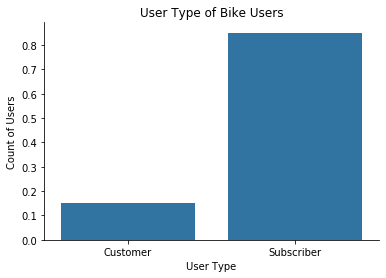

In [17]:
users =df.groupby('user_type').size()/df.shape[0]
base_color = sb.color_palette()[0]
sb.barplot(users.index.values, users, color = base_color)
plt.title('User Type of Bike Users')
plt.xlabel('User Type')
plt.ylabel('Count of Users')
sb.despine();

>From the visual above, we can see that 85% of Fordgo bike users are Subscribers, While 15%are users are Customers.This means that most fordgo users in 2018 are Subscribers.

In [18]:
df.bike_share_for_all_trip.value_counts()

No     1690457
Yes     161493
Name: bike_share_for_all_trip, dtype: int64

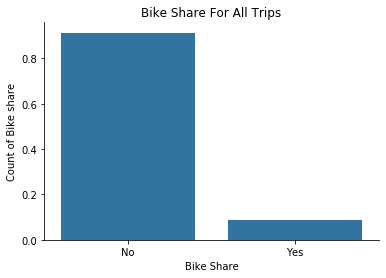

In [19]:
bike_share =df.groupby('bike_share_for_all_trip').size()/df.shape[0]
base_color = sb.color_palette()[0]
sb.barplot(bike_share.index.values, bike_share, color = base_color)
plt.title('Bike Share For All Trips')
plt.xlabel('Bike Share')
plt.ylabel('Count of Bike share')
sb.despine();

>From the visual above, we can see that 91% of Fordgo bike users did not share their bike for all trip, While 8%are users share their bike. This means that most fordgo users in 2018 ride all alone.

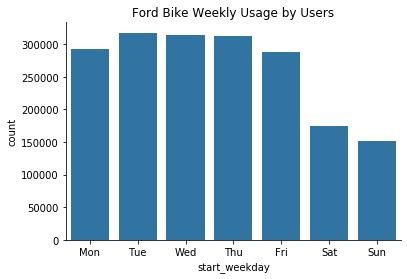

In [20]:
base_color = sb.color_palette()[0]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(x='start_weekday',data=df,color=base_color, order=weekday)
sb.despine()
plt.title('Ford Bike Weekly Usage by Users');

>From the visualization above, we can see that in 2018 
>* Tuesday has the highest number of users followed by Wednesday and Thursday.Saturday and Sunday has the lowest number of users.
>* Monday to Friday has above 250000 users.
>* This means that most users use ford bike mostly on weekdays for commuting purposes during working days. 

In [21]:
df.start_month.value_counts()

October      200102
July         196038
June         193907
August       189250
September    184635
May          179125
November     133651
December     131171
April        131169
March        111382
February     106718
January       94802
Name: start_month, dtype: int64

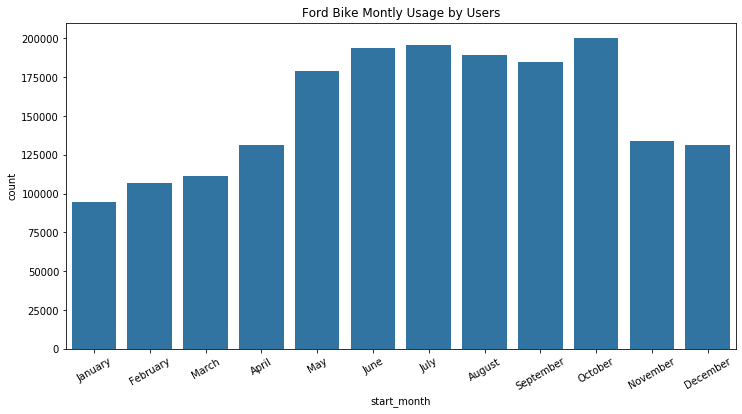

In [22]:
base_color = sb.color_palette()[0]
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
         'September', 'October', 'November', 'December']
plt.figure(figsize=(12,6))
sb.countplot(x='start_month',data=df,color=base_color,order=month)
plt.xticks(rotation=30)
plt.title('Ford Bike Montly Usage by Users');

> From the visualization above, we can see that:
>* October has the highest number of usage, followed by July then June, August,September.
>* This mean that Ford bike users mostly make use of the bikes during summer which makes sense because Weather conditions have a significant effect on the bicycle Sharing system.

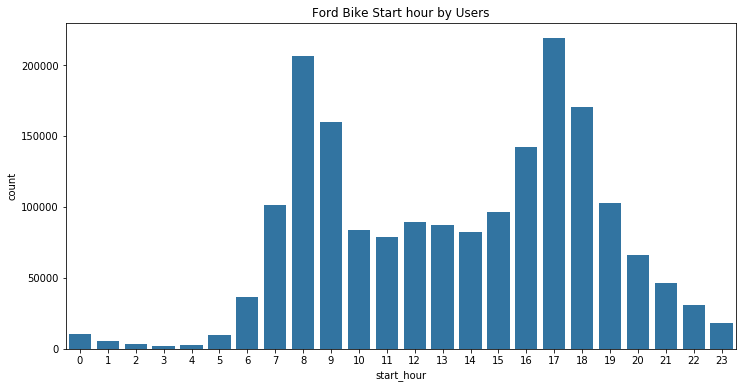

In [23]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(12,6))
sb.countplot(x='start_hour',data=df,color=base_color)
plt.title('Ford Bike Start hour by Users');

>From the visualization above, we can see that:
>* Most user use the bike sharing system in the morning around 8am-9am and in the evening around 5pm-6pm.
>* This could mean that the rush hour of the bike sharing system is between 8am-9pm and 5pm-6pm which makes sense because that is when people resume work in the US.
>* The bike is primarily used as a means of transportation to work by users.

In [24]:
df.duration_min.describe()

count    1.851950e+06
mean     1.421666e+01
std      3.899084e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.250000e+00
75%      1.450000e+01
max      1.439433e+03
Name: duration_min, dtype: float64

In [25]:
df.duration_min.mean()

14.21665616422401

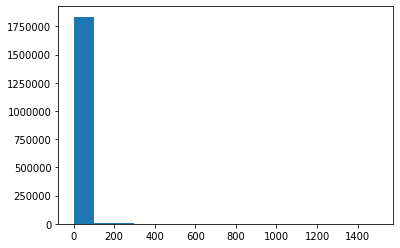

In [26]:
bin_edges = np.arange(0, df['duration_min'].max()+100, 100)
plt.hist(data = df, x = 'duration_min', bins = bin_edges);

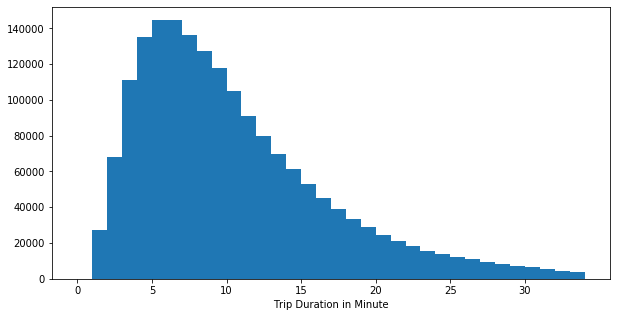

In [27]:
bins_edges = np.arange(0, 35, 1)
ticks = np.arange(0, 35, 5)
plt.figure(figsize = [10, 5])
plt.hist(data=df, x='duration_min', bins=bins_edges);
plt.xticks(ticks, ticks)
plt.xlabel('Trip Duration in Minute');


> From the visualization above, we can see that
>* Most trips are between 4 to 10minutes.
>* The average trip takes up to 14 minutes.
>* Users only use the Ford bike sharing system for short trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For user type:
>* we can see that 85% of Fordgo bike users are Subscribers, While 15%are users are Customers.This means that most fordgo users in 2018 are Subscribers.

>For bike for all trip variable:
>* 91% of Fordgo bike users did not share their bike for all trip, While 8%are users share their bike. This means that most fordgo users in 2018 ride all alone.

> For start weekday variable:
>* Tuesday has the highest number of users followed by Wednesday and Thursday.Saturday and Sunday has the lowest number of users.
>* Monday to Friday has above 250000 users.

>For start month variable:
>* October has the highest number of usage, followed by July then June, August,September.
>* This mean that Ford bike users mostly make use of the bikes during summer which makes sense because weather conditions have a significant effect on the bicycle Sharing system.

> For start hour variable:
>* Most user use the bike sharing system in the morning around 8am-9am and in the evening around 5pm-6pm.
>* This could mean that the rush hour of the bike sharing system is between 8am-9pm and 5pm-6pm which makes sense because that is when people resume work in the US.

> For duration minutes variable:
>* Most trips are between 4 to 10minutes.
>* The average trip takes up to 14 minutes.
>* Users only use the Ford bike sharing system for short trips.

> I did not perform any transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During visualization, the duration minutes variable distribution was not clear. so I performed an operation using Xticks()while plotting which makes the distribution more clearer.

## Bivariate Exploration

> In this section, I will be investigating the relationships between pairs of variables in your
data.

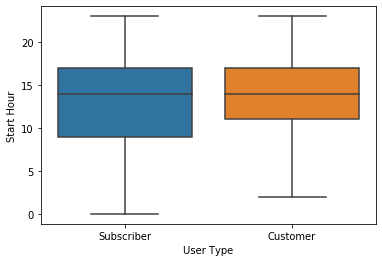

In [28]:
sb.boxplot(data=df, x='user_type', y='start_hour',showfliers=False);
plt.title('Start Hour of User Type')
plt.xlabel('User Type');
plt.ylabel('Start Hour');

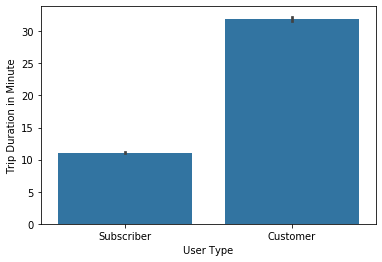

In [29]:
sb.barplot(data=df, x='user_type', y='duration_min', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

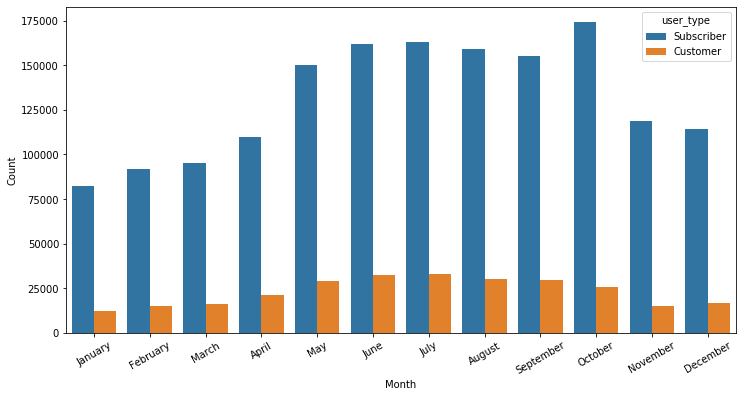

In [30]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_month', hue='user_type',order=month);
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

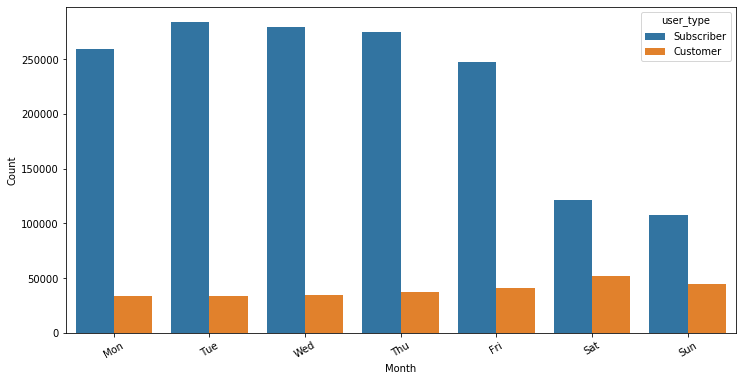

In [31]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_weekday', hue='user_type',order=weekday);
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

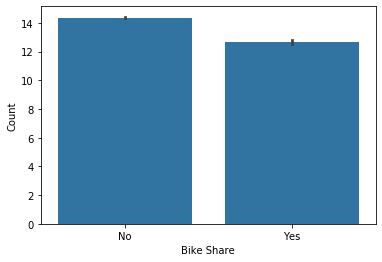

In [32]:
# df.groupby('bike_share_for_all_trip').size()['duration_min']

sb.barplot(data=df, x= 'bike_share_for_all_trip', y='duration_min',color=base_color);

plt.xlabel('Bike Share');
plt.ylabel('Count');

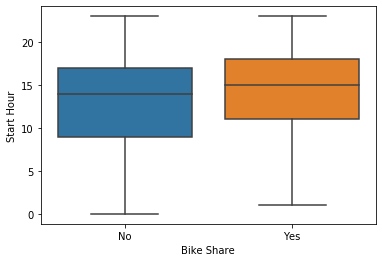

In [33]:
sb.boxplot(data=df, x='bike_share_for_all_trip', y='start_hour',showfliers=False);

plt.xlabel('Bike Share');
plt.ylabel('Start Hour');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

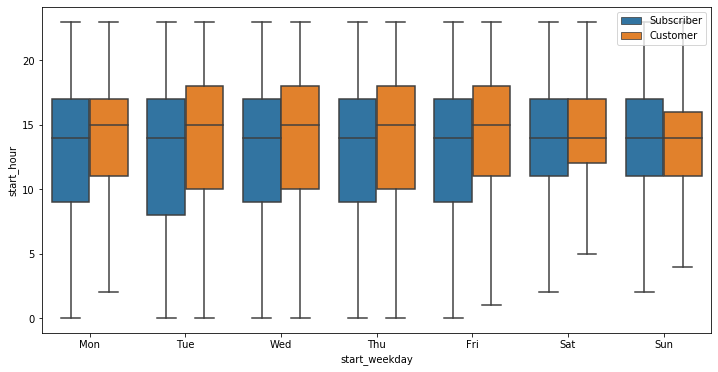

In [63]:
plt.figure(figsize=(12,6))
sb.boxplot(x="start_weekday", y="start_hour", hue="user_type",data=df,showfliers=False,order=weekday)
plt.legend(loc = 'upper right');

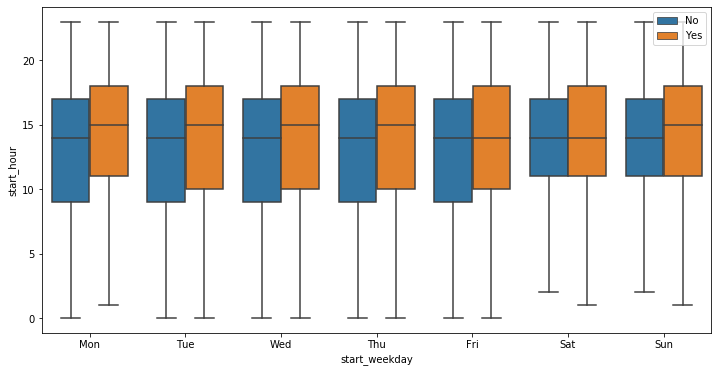

In [64]:
plt.figure(figsize=(12,6))
sb.boxplot(x="start_weekday", y="start_hour", hue="bike_share_for_all_trip",data=df,showfliers=False,order=weekday)
plt.legend(loc = 'upper right');

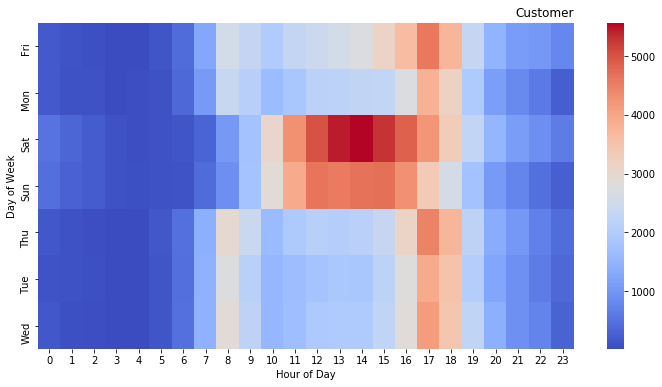

In [58]:
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')
plt.figure(figsize=(12,6))
sb.heatmap(ct_counts, cmap='coolwarm');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


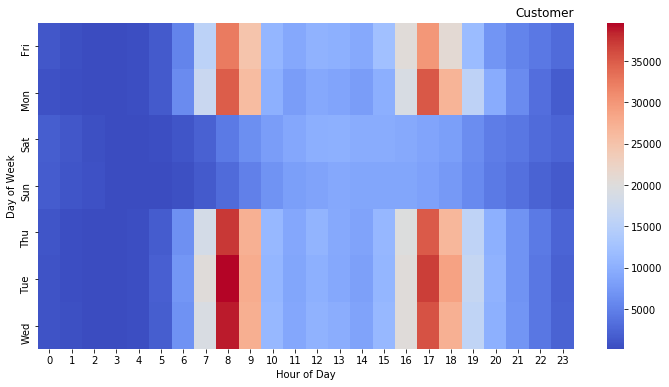

In [62]:
customers = df.query('user_type == "Subscriber"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')
plt.figure(figsize=(12,6))
sb.heatmap(ct_counts, cmap='coolwarm');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!